Carregamento dos dados e importações

In [1]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import os
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MaxNLocator

cor_padrao = '#003057'


In [3]:
BASE_DIR = Path.cwd().parent

In [4]:
DATA_PROCESSED = BASE_DIR/'data'/'processed'

In [5]:
datas = pd.read_csv(DATA_PROCESSED/'ceaps_tratados18-22.csv', sep=';', decimal= '.', encoding= 'latin1')

1 - Total de gastos apurado no período

In [14]:
pd.DataFrame([{'2018 - 2022': 'TOTAL',
            'VALOR_REEMBOLSADO': f'R$ {datas['VALOR_REEMBOLSADO'].sum():,.2f}'.replace(',','X').replace('.',',').replace('X','.')
            }], index = [''])

,2018 - 2022,VALOR_REEMBOLSADO
,TOTAL,"R$ 70.235.684,44"


O valor foi apurado entre o período apontado e os percentuais de proporcionalidade são:

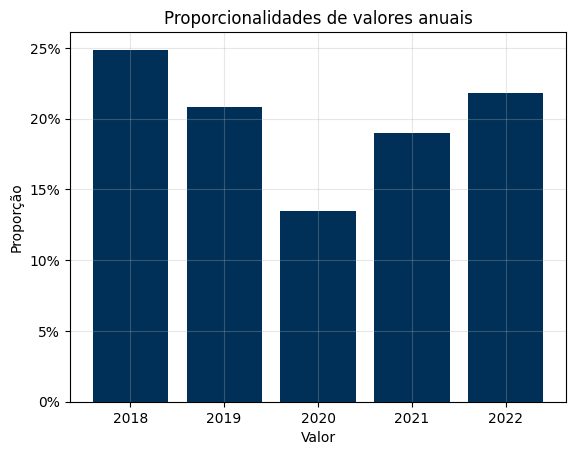

In [7]:


valor_por_ano = datas.groupby('ANO')['VALOR_REEMBOLSADO'].sum()
valor_total = datas['VALOR_REEMBOLSADO'].sum()
proporcao = round((valor_por_ano /valor_total)*100,2)

fig, ax = plt.subplots()

ax.bar(proporcao.index, proporcao.values, color = cor_padrao)

ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y:.0f}%'))


ax.set_title('Proporcionalidades de valores anuais')
ax.set_xlabel('Valor')
ax.set_ylabel('Proporção')


ax.grid('x', alpha = 0.3)
plt.show()

É notória participação dos anos extremos no que tange à proporcionalidade, fatores externos como eleições, períodos pandêmicos, como aqui citado, contribuem para a latência da proporcionalidade dos dados nos anos extremos de análise.

2 - Como os gastos evoluíram durante os anos?

In [8]:
def formatar_brl(x, pos):
    return f'R$ {x:,.2f}'.replace(',','X').replace('.',',').replace('X','.')

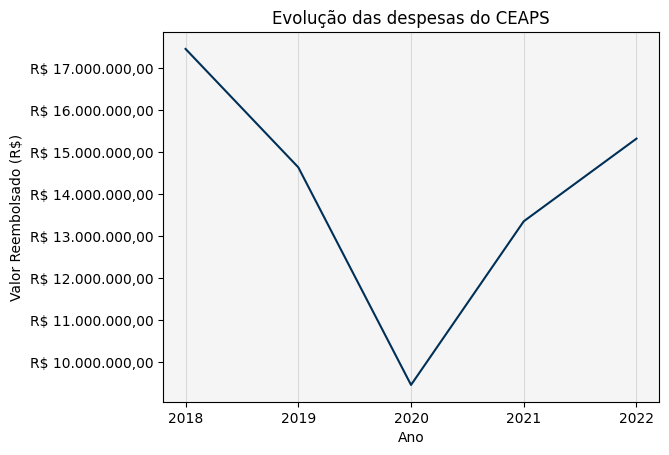

In [9]:
fig, ax = plt.subplots()

ax.plot(datas.groupby('ANO')['VALOR_REEMBOLSADO'].sum().index, datas.groupby('ANO')['VALOR_REEMBOLSADO'].sum().values, 
        color = cor_padrao,
        ls = '-')

ax.yaxis.set_major_formatter(FuncFormatter(formatar_brl))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
fig.patch.set_color('white')  
ax.patch.set_color('#f5f5f5')


ax.set_title('Evolução das despesas do CEAPS', )
ax.set_ylabel('Valor Reembolsado (R$)')
ax.set_xlabel('Ano')

ax.grid(axis = 'x', alpha = 0.4)
plt.show()

A análise temporal de utilização das cotas parlamentares indica uma redução significativa do uso entre 2019 e 2020, período que registrou-se a menor nível de utilização na série analisada. A partir de 2021, observa-se um comportamento de recuperação com retorno gradual de utlização das cotas parlamentares. 

Dessa forma, torna-se possível alegar que houveram fatores externos que favoreceram a instabilidade do uso dos gastos com cotas parlamentares de exercício.

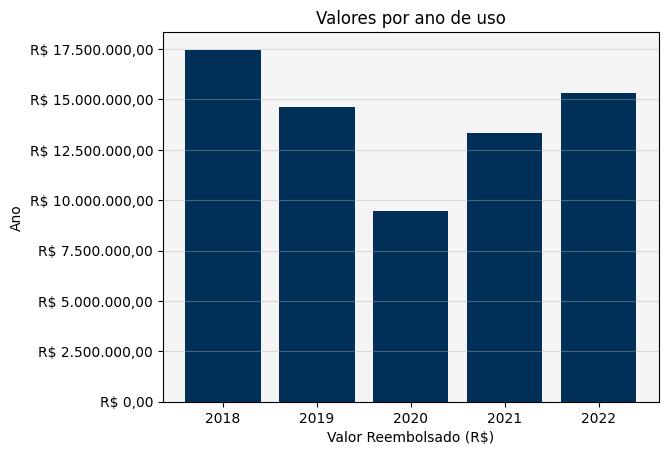

In [10]:
fig, ax = plt.subplots()

ax.bar(datas.groupby('ANO')['VALOR_REEMBOLSADO'].sum().index, datas.groupby('ANO')['VALOR_REEMBOLSADO'].sum().values, color = cor_padrao)

ax.yaxis.set_major_formatter(FuncFormatter(formatar_brl))
ax.xaxis.set_major_locator(MaxNLocator(integer = True))
fig.patch.set_color('white')
ax.patch.set_color('#f5f5f5')

ax.set_title('Valores por ano de uso', )
ax.set_xlabel('Valor Reembolsado (R$)')
ax.set_ylabel('Ano')

ax.grid(axis='y', alpha = 0.4)
plt.show()

Agora por barras, é possívele videnciar mais ainda os valores que foram realmente gastos e seus comparativos com os outros anos.

3 - Concentração de despesas

In [11]:
datas.groupby('SENADOR')['VALOR_REEMBOLSADO'].sum().sort_values(ascending = False).tail(10)

SENADOR
RODRIGUES PALMA           16694.85
ALOYSIO NUNES FERREIRA    11684.05
IONE GUIMARÃES            11379.91
LUIZ CARLOS DO CARMO      10986.28
IRAJÁ                     10863.51
NEY SUASSUNA               9323.91
SIQUEIRA CAMPOS            5926.99
SAMUEL ARAUJO              3233.90
VIRGINIO DE CARVALHO       3135.96
NAILDE PANTA               1650.62
Name: VALOR_REEMBOLSADO, dtype: float64

3.1 - Quais são os senadores que mais utilizaram cotas parlamentares no período?

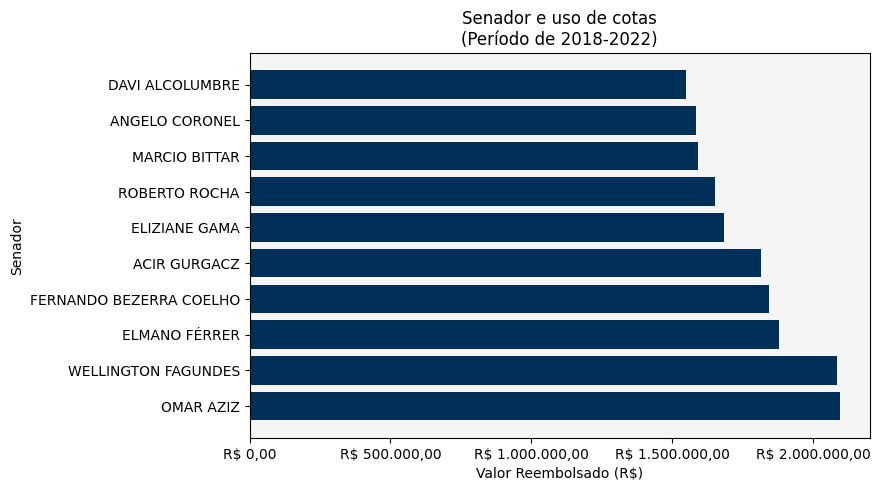

In [12]:
top_senadores = datas.groupby('SENADOR')['VALOR_REEMBOLSADO'].sum()

top_senadores = top_senadores.sort_values(ascending = False)

top_10 = top_senadores.head(10)

fig, ax = plt.subplots(figsize = (8,5))
ax.barh(top_10.index, top_10.values, color = cor_padrao)

ax.xaxis.set_major_formatter(FuncFormatter(formatar_brl))
ax.xaxis.set_major_locator(MaxNLocator(nbins=5))
fig.patch.set_color('white')
ax.patch.set_color('#f5f5f5')

ax.set_title('Senador e uso de cotas\n(Período de 2018-2022)', )
ax.set_xlabel('Valor Reembolsado (R$)')
ax.set_ylabel('Senador')

plt.show()


Ao observar o grupo de senadores com maior utilização das CEAPS, podemos notar que muitos deles tem um tempo de atuação maior em comparação aos demais que menos utilizam. Embora essa relação não possa ser confirmada de forma casual a partir dessa análise de dados, pode-se inferir que a experiência e a permanência no cargo podem aumentar a intensidade da utilização das cotas parlamentares.

Esse resultado pode ser interpretado como um indício exploratório e não como uma relação direta de causa e efeito.

3.2 - Finalidade do uso e frequência

In [ ]:
dat

In [13]:
datas.columns

Index(['ANO', 'MES', 'SENADOR', 'TIPO_DESPESA', 'CNPJ_CPF', 'FORNECEDOR',
       'DOCUMENTO', 'DATA', 'DETALHAMENTO', 'VALOR_REEMBOLSADO',
       'COD_DOCUMENTO', 'COMPETENCIA'],
      dtype='object')